## Определение перспективного тарифа для телеком-компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

#### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

#### Примечание

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

# Этап 1

**Откроем файлы с данными и изучим общую информацию:**

In [1]:
import pandas as pd
import numpy as np

calls=pd.read_csv('calls.csv')
internet=pd.read_csv('internet.csv')
messages=pd.read_csv('messages.csv')
tariffs=pd.read_csv('tariffs.csv')
users=pd.read_csv('users.csv')

all_df_list=[calls, internet, messages, tariffs, users]
for n in all_df_list:
    display(n.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Определим сколько численно пользователей каждого тарифа в данной выборке:

In [2]:
total_users = len(users['user_id'].unique())
ultra_users = users.query('tariff == "ultra"')['user_id'].count()
smart_users = users.query('tariff == "smart"')['user_id'].count()
print('В данной выборке {} абонентов тарифа Ultra ({:.1%}), и {} абонент ({:.1%}) тарифа Smart, а в выборке {} подписчиков.'.format(ultra_users, ultra_users/total_users, smart_users, smart_users/total_users, total_users))

В данной выборке 149 абонентов тарифа Ultra (29.8%), и 351 абонент (70.2%) тарифа Smart, а в выборке 500 подписчиков.


Посмотрим на информацию по ним:

In [3]:
for n in all_df_list:
    n.info()
    print()
    print('--------------------------------')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

--------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

--------------------------------

<class 'pandas.core.frame.DataFr

### Описание данных

##### Таблица users (информация о пользователях):
* **user_id** — уникальный идентификатор пользователя
* **first_name** — имя пользователя
* **last_name** — фамилия пользователя
* **age — возраст** пользователя (годы)
* **reg_date** — дата подключения тарифа (день, месяц, год)
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* **city** — город проживания пользователя
* **tariff** — название тарифного плана

##### Таблица calls (информация о звонках):
* **id** — уникальный номер звонка
* **call_date** — дата звонка
* **duration** — длительность звонка в минутах
* **user_id** — идентификатор пользователя, сделавшего звонок

##### Таблица messages (информация о сообщениях):
* **id** — уникальный номер сообщения
* **message_date** — дата сообщения
* **user_id** — идентификатор пользователя, отправившего сообщение

##### Таблица internet (информация об интернет-сессиях):
* **id** — уникальный номер сессии
* **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
* **session_date** — дата интернет-сессии
* **user_id** — идентификатор пользователя

##### Таблица tariffs (информация о тарифах):
* **tariff_name** — название тарифа
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод (описание данных)

1. Неподходящий для обработки тип данных object там, где нужен int в большинстве таблиц. 
2. Даты отформатированы как object вместо datetime.
2. Пропуски имеются только в таблице users в колонке churn_date

# Этап 2

## Подготовьте данные

* Приведите данные к нужным типам;
* Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Во всех таблицах кроме **tariffs** даты приведены в неправильном формате **(object)**. Приведём их к нужному типу **datetime**:

In [4]:
import datetime
from datetime import date

In [5]:
users['churn_date'].isna().sum()

462

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

В рамках предобработки заполним пропуски в **users['churn_date']** первой датой, которую принимают за 0 - 1 января 1970 года.
Дата в прошлом, поэтому легко будет найти отличающиеся значения. Также пометим их в отдельной колонке:

In [7]:
users['churn_date'] = users['churn_date'].fillna('1970-01-01')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [8]:
def date_ind(x):
    if x['churn_date'] == datetime.datetime(1970, 1, 1):
        return 1
    return 0

users['current_user'] = users.apply(date_ind, axis=1)
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,current_user
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart,1
2,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
5,1005,67,1970-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
6,1006,21,1970-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,1
7,1007,65,1970-01-01,Москва,Юна,Березина,2018-04-19,smart,1
8,1008,63,1970-01-01,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,1
9,1009,24,1970-01-01,Пермь,Василиса,Блинова,2018-03-22,smart,1


Небольшая проверка правильно ли мы всё сделали:

In [9]:
users['current_user'].sum()

462

In [10]:
for n in all_df_list:
    n.info()
    print()
    print('--------------------------------')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB

--------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[

Посмотрим на проблему со звонками:

<AxesSubplot:>

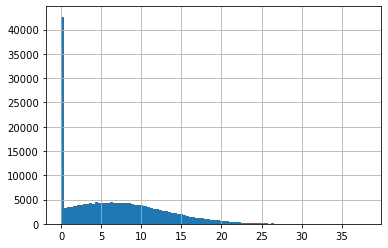

In [11]:
calls['duration'].hist(bins=100)

In [12]:
print('{:.2%}'.format(calls[calls['duration'] == 0]['duration'].count() / calls['duration'].count()))

19.55%


Почти пятая часть данных - это звонки с нулями. Посмотрим какое распределение имеют :

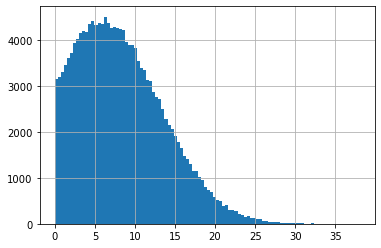

In [13]:
calls.query('duration != 0')['duration'].hist(bins=100);

In [14]:
import matplotlib.pyplot as plt

(0.0, 25.0)

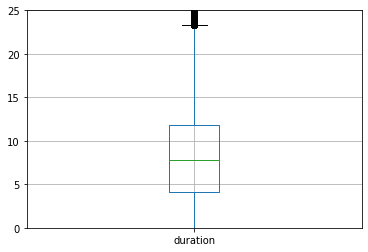

In [15]:
calls.query('duration != 0').boxplot('duration');
plt.ylim(0, 25)

Выглядит как "нормальное" Пуассоновское распределение. В большинстве звонков люди говорят не больше 23 минут.

Посмотрим что говорит описание данных:

In [16]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Медиана равна 6 минутам, а среднее - 6.76.

В задаче 0 указан как пропущенный звонок и их не следует удалять.

Для всех пользователей высчитаем среднее количество минут:

In [17]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [18]:
user_calls_mean = calls.groupby(['user_id']).mean()
user_calls_mean

,duration
user_id,
1000,6.571304
1001,6.552951
1002,6.595253
1003,6.924077
1004,5.234148
...,...
1495,6.528442
1496,6.837403
1497,6.590448


In [19]:
len(calls['user_id'].unique())

492

Можно сделать вывод, что какие-то пользователи вообще не пользуются звонками.

Заменим нулевые значения на единицу. Т.е предположим, что это короткие разговоры, длительность которых не записалась, возьмем и припишем им 1 минуту, чтобы они были значимы, но не сильно влияли в сумме.

In [20]:
def change_zero_duration(row):
    if row['duration'] == 0.0:
        return 1
    return row['duration']

# Применим функцию к calls:
calls['duration'] = calls.apply(change_zero_duration, axis = 1)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Посмотрим теперь что получилось:

In [21]:
calls[calls['duration'] ==0]['duration'].count()

0

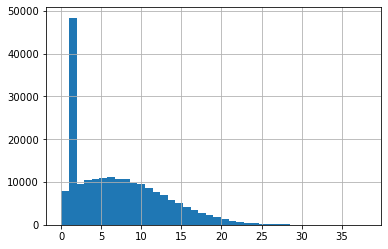

In [22]:
calls['duration'].hist(bins=40);

Чтобы подсчитать количество сделанных звонков нужно понять какой тариф у абонента из таблицы users и сколько у него минут в тарифе из таблицы tariffs:

In [23]:
calls_b = pd.merge(calls, users[['user_id','tariff']], on='user_id')
calls_count = pd.merge(calls_b, tariffs[['tariff_name', 'minutes_included']], left_on='tariff', right_on='tariff_name')

In [24]:
calls_b

,id,call_date,duration,user_id,tariff
0,1000_0,2018-07-25,1.00,1000,ultra
1,1000_1,2018-08-17,1.00,1000,ultra
2,1000_2,2018-06-11,2.85,1000,ultra
3,1000_3,2018-09-21,13.80,1000,ultra
4,1000_4,2018-12-15,5.18,1000,ultra
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,smart
202603,1499_216,2018-10-18,18.83,1499,smart
202604,1499_217,2018-11-10,10.81,1499,smart
202605,1499_218,2018-10-06,4.27,1499,smart


In [25]:
calls_count

,id,call_date,duration,user_id,tariff,tariff_name,minutes_included
0,1000_0,2018-07-25,1.00,1000,ultra,ultra,3000
1,1000_1,2018-08-17,1.00,1000,ultra,ultra,3000
2,1000_2,2018-06-11,2.85,1000,ultra,ultra,3000
3,1000_3,2018-09-21,13.80,1000,ultra,ultra,3000
4,1000_4,2018-12-15,5.18,1000,ultra,ultra,3000
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,smart,smart,500
202603,1499_216,2018-10-18,18.83,1499,smart,smart,500
202604,1499_217,2018-11-10,10.81,1499,smart,smart,500
202605,1499_218,2018-10-06,4.27,1499,smart,smart,500


Избавимся от лишнего столбца:

In [26]:
calls_count = calls_count.drop(columns=['tariff_name'])

Добавим столбец с месяцами:

In [27]:
calls_count['month'] = calls_count.apply(lambda x: x['call_date'].month, axis=1)
calls_count

,id,call_date,duration,user_id,tariff,minutes_included,month
0,1000_0,2018-07-25,1.00,1000,ultra,3000,7
1,1000_1,2018-08-17,1.00,1000,ultra,3000,8
2,1000_2,2018-06-11,2.85,1000,ultra,3000,6
3,1000_3,2018-09-21,13.80,1000,ultra,3000,9
4,1000_4,2018-12-15,5.18,1000,ultra,3000,12
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,smart,500,12
202603,1499_216,2018-10-18,18.83,1499,smart,500,10
202604,1499_217,2018-11-10,10.81,1499,smart,500,11
202605,1499_218,2018-10-06,4.27,1499,smart,500,10


По условию "Мегалайн" округляет совершённые звонки вверх:

In [28]:
calls_count['duration'] = calls_count['duration'].round()
calls_count

,id,call_date,duration,user_id,tariff,minutes_included,month
0,1000_0,2018-07-25,1.0,1000,ultra,3000,7
1,1000_1,2018-08-17,1.0,1000,ultra,3000,8
2,1000_2,2018-06-11,3.0,1000,ultra,3000,6
3,1000_3,2018-09-21,14.0,1000,ultra,3000,9
4,1000_4,2018-12-15,5.0,1000,ultra,3000,12
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,smart,500,12
202603,1499_216,2018-10-18,19.0,1499,smart,500,10
202604,1499_217,2018-11-10,11.0,1499,smart,500,11
202605,1499_218,2018-10-06,4.0,1499,smart,500,10


Посчитаем сколько было израсходовано минут и сколько было совершено звонков по месяцам:

In [29]:
calls_pt = calls_count[['user_id', 'month', 'duration']].pivot_table(index=['user_id', 'month'], aggfunc=['sum', 'count'])
calls_pt.columns = ['duration_sum', 'call_count']
calls_pt = calls_pt.reset_index(0)
calls_pt = calls_pt.reset_index(0)
calls_pt

,month,user_id,duration_sum,call_count
0,5,1000,154.0,22
1,6,1000,174.0,43
2,7,1000,325.0,47
3,8,1000,401.0,52
4,9,1000,451.0,58
...,...,...,...,...
3169,10,1498,241.0,41
3170,9,1499,65.0,9
3171,10,1499,453.0,68
3172,11,1499,586.0,74


Объединим таблицы:

In [30]:
calls_fin = pd.merge(calls_pt, users[['user_id','tariff']], on='user_id')
calls_fin

,month,user_id,duration_sum,call_count,tariff
0,5,1000,154.0,22,ultra
1,6,1000,174.0,43,ultra
2,7,1000,325.0,47,ultra
3,8,1000,401.0,52,ultra
4,9,1000,451.0,58,ultra
...,...,...,...,...,...
3169,10,1498,241.0,41,smart
3170,9,1499,65.0,9,smart
3171,10,1499,453.0,68,smart
3172,11,1499,586.0,74,smart


In [31]:
calls_final = pd.merge(calls_fin, tariffs[['minutes_included', 'tariff_name', 'rub_per_minute']], left_on='tariff', right_on='tariff_name')
calls_final = calls_final.drop(columns=['tariff_name'])
calls_final

,month,user_id,duration_sum,call_count,tariff,minutes_included,rub_per_minute
0,5,1000,154.0,22,ultra,3000,1
1,6,1000,174.0,43,ultra,3000,1
2,7,1000,325.0,47,ultra,3000,1
3,8,1000,401.0,52,ultra,3000,1
4,9,1000,451.0,58,ultra,3000,1
...,...,...,...,...,...,...,...
3169,10,1498,241.0,41,smart,500,3
3170,9,1499,65.0,9,smart,500,3
3171,10,1499,453.0,68,smart,500,3
3172,11,1499,586.0,74,smart,500,3


In [32]:
calls_final['duration_sum']=calls_final['duration_sum'].apply(int)


In [33]:
calls_final['rub_minutes_overspent'] = calls_final.apply(lambda x: 0 if (x['duration_sum'] - x['minutes_included'])<0 else (x['duration_sum'] - x['minutes_included'])*x['rub_per_minute'], axis=1)

In [34]:
calls_final

,month,user_id,duration_sum,call_count,tariff,minutes_included,rub_per_minute,rub_minutes_overspent
0,5,1000,154,22,ultra,3000,1,0
1,6,1000,174,43,ultra,3000,1,0
2,7,1000,325,47,ultra,3000,1,0
3,8,1000,401,52,ultra,3000,1,0
4,9,1000,451,58,ultra,3000,1,0
...,...,...,...,...,...,...,...,...
3169,10,1498,241,41,smart,500,3,0
3170,9,1499,65,9,smart,500,3,0
3171,10,1499,453,68,smart,500,3,0
3172,11,1499,586,74,smart,500,3,258


In [35]:
calls_final_new=calls_final[['month','user_id','rub_minutes_overspent']].pivot_table(index= 'user_id', columns='month', aggfunc = 'sum').fillna(0)
calls_final_new

rub_minutes_overspent                                              \
month                      1      2     3     4    5      6      7     8    
user_id                                                                     
1000                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1001                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1002                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1003                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1004                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
...                       ...    ...   ...   ...  ...    ...    ...   ...   
1495                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1496                      0.0  216.0  93.0  30.0  0.0  135.0  180.0  69.0   
1497                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1498                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1499                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   

                                
month     9    10     11    12  
user_id                         
1000     0.0  0.0    0.0   0.0  
1001     0.0  0.0    0.0   0.0  
1002     0.0  0.0    0.0   0.0  
1003     0.0  0.0    0.0   0.0  
1004     0.0  0.0    0.0   0.0  
...      ...  ...    ...   ...  
1495     0.0  0.0    0.0   0.0  
1496     0.0  0.0  444.0   0.0  
1497     0.0  0.0    0.0  87.0  
1498     0.0  0.0    0.0   0.0  
1499     0.0  0.0  258.0   0.0  

[492 rows x 12 columns]

In [36]:
calls_final_new['sum_for_all_time'] = calls_final_new.apply(sum, axis=1)
calls_final_new

rub_minutes_overspent                                              \
month                       1      2     3     4    5      6      7     8   
user_id                                                                     
1000                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1001                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1002                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1003                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1004                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
...                       ...    ...   ...   ...  ...    ...    ...   ...   
1495                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1496                      0.0  216.0  93.0  30.0  0.0  135.0  180.0  69.0   
1497                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1498                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   
1499                      0.0    0.0   0.0   0.0  0.0    0.0    0.0   0.0   

                               sum_for_all_time  
month      9   10     11    12                   
user_id                                          
1000     0.0  0.0    0.0   0.0              0.0  
1001     0.0  0.0    0.0   0.0              0.0  
1002     0.0  0.0    0.0   0.0              0.0  
1003     0.0  0.0    0.0   0.0              0.0  
1004     0.0  0.0    0.0   0.0              0.0  
...      ...  ...    ...   ...              ...  
1495     0.0  0.0    0.0   0.0              0.0  
1496     0.0  0.0  444.0   0.0           1167.0  
1497     0.0  0.0    0.0  87.0             87.0  
1498     0.0  0.0    0.0   0.0              0.0  
1499     0.0  0.0  258.0   0.0            258.0  

[492 rows x 13 columns]

Те же самые манипуляции нужно проделать с **messages**:

In [37]:
messages_b = pd.merge(messages, users[['user_id','tariff']], on='user_id')
messages_count = pd.merge(messages_b, tariffs[['tariff_name']], left_on='tariff', right_on='tariff_name')
messages_count = messages_count.drop(columns=['tariff_name'])
messages_count

,id,message_date,user_id,tariff
0,1000_0,2018-06-27,1000,ultra
1,1000_1,2018-10-08,1000,ultra
2,1000_2,2018-08-04,1000,ultra
3,1000_3,2018-06-16,1000,ultra
4,1000_4,2018-12-05,1000,ultra
...,...,...,...,...
123031,1499_179,2018-12-12,1499,smart
123032,1499_180,2018-09-28,1499,smart
123033,1499_181,2018-09-27,1499,smart
123034,1499_182,2018-11-15,1499,smart


Добавим столбец с месяцами и сделаем сводную таблицу для сообщений:

In [38]:
messages_count['month'] = messages_count.apply(lambda x: x['message_date'].month, axis=1)
messages_pt = messages_count[['user_id', 'month', 'id']].pivot_table(index=['user_id', 'month'], aggfunc=['count'])
messages_pt.columns = ['msg_count']
messages_pt

msg_count
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

Так же как и в прошлом примере сбросим месяцы и user_id чтобы превратить таблицу в одноуровневую:

In [39]:
messages_pt = messages_pt.reset_index(0)
messages_pt = messages_pt.reset_index(0)
messages_pt

,month,user_id,msg_count
0,5,1000,22
1,6,1000,60
2,7,1000,75
3,8,1000,81
4,9,1000,57
...,...,...,...
2712,10,1498,42
2713,9,1499,11
2714,10,1499,48
2715,11,1499,59


Объединим таблицы:

In [40]:
messages_fin = pd.merge(messages_pt, users[['user_id','tariff']], on='user_id')
messages_final = pd.merge(messages_fin, tariffs[['tariff_name', 'messages_included', 'rub_per_message']], left_on='tariff', right_on='tariff_name')
messages_final = messages_final.drop(columns=['tariff_name'])
messages_final

,month,user_id,msg_count,tariff,messages_included,rub_per_message
0,5,1000,22,ultra,1000,1
1,6,1000,60,ultra,1000,1
2,7,1000,75,ultra,1000,1
3,8,1000,81,ultra,1000,1
4,9,1000,57,ultra,1000,1
...,...,...,...,...,...,...
2712,10,1498,42,smart,50,3
2713,9,1499,11,smart,50,3
2714,10,1499,48,smart,50,3
2715,11,1499,59,smart,50,3


Добавим колонку в которой считается разница в рублях между включенными минутами и тем, что абонент потратил сверх тарифа:

In [41]:
messages_final['rub_msg_overspent'] = messages_final.apply(lambda x: 0 if (x['messages_included'] - x['msg_count']) < 0 else (x['messages_included'] - x['msg_count']) * x['rub_per_message'], axis = 1)
messages_final

,month,user_id,msg_count,tariff,messages_included,rub_per_message,rub_msg_overspent
0,5,1000,22,ultra,1000,1,978
1,6,1000,60,ultra,1000,1,940
2,7,1000,75,ultra,1000,1,925
3,8,1000,81,ultra,1000,1,919
4,9,1000,57,ultra,1000,1,943
...,...,...,...,...,...,...,...
2712,10,1498,42,smart,50,3,24
2713,9,1499,11,smart,50,3,117
2714,10,1499,48,smart,50,3,6
2715,11,1499,59,smart,50,3,0


In [42]:
messages_final_new=messages_final[['month','user_id','rub_msg_overspent']].pivot_table(index= 'user_id', columns='month', aggfunc = 'sum').fillna(0)
messages_final_new

rub_msg_overspent                                                \
month                  1     2     3     4      5      6      7      8    
user_id                                                                   
1000                  0.0   0.0   0.0   0.0  978.0  940.0  925.0  919.0   
1002                  0.0   0.0   0.0   0.0    0.0  138.0  117.0  111.0   
1003                  0.0   0.0   0.0   0.0    0.0    0.0    0.0  963.0   
1004                  0.0   0.0   0.0   0.0  905.0  866.0  819.0  849.0   
1005                129.0  36.0   0.0  27.0   24.0    9.0    0.0    0.0   
...                   ...   ...   ...   ...    ...    ...    ...    ...   
1495                  0.0   0.0   0.0   0.0    0.0    0.0    0.0  987.0   
1496                123.0  15.0  12.0   3.0   30.0   45.0   24.0   27.0   
1497                  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   
1498                  0.0   0.0   0.0   0.0    0.0    0.0   90.0    0.0   
1499                  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   

                                     
month       9      10     11     12  
user_id                              
1000     943.0  927.0  942.0  930.0  
1002     138.0  120.0  102.0  114.0  
1003     909.0  917.0  906.0  925.0  
1004     854.0  835.0  842.0  838.0  
1005       0.0   18.0    0.0    0.0  
...        ...    ...    ...    ...  
1495     918.0  918.0  921.0  916.0  
1496      63.0   45.0   12.0    0.0  
1497       0.0   90.0  108.0   99.0  
1498      18.0   24.0    0.0    0.0  
1499     117.0    6.0    0.0    0.0  

[426 rows x 12 columns]

In [43]:
messages_final_new['sum_for_all_time'] = messages_final_new.apply(sum, axis=1)
messages_final_new

rub_msg_overspent                                                \
month                   1     2     3     4      5      6      7      8   
user_id                                                                   
1000                  0.0   0.0   0.0   0.0  978.0  940.0  925.0  919.0   
1002                  0.0   0.0   0.0   0.0    0.0  138.0  117.0  111.0   
1003                  0.0   0.0   0.0   0.0    0.0    0.0    0.0  963.0   
1004                  0.0   0.0   0.0   0.0  905.0  866.0  819.0  849.0   
1005                129.0  36.0   0.0  27.0   24.0    9.0    0.0    0.0   
...                   ...   ...   ...   ...    ...    ...    ...    ...   
1495                  0.0   0.0   0.0   0.0    0.0    0.0    0.0  987.0   
1496                123.0  15.0  12.0   3.0   30.0   45.0   24.0   27.0   
1497                  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   
1498                  0.0   0.0   0.0   0.0    0.0    0.0   90.0    0.0   
1499                  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   

                                    sum_for_all_time  
month        9     10     11     12                   
user_id                                               
1000     943.0  927.0  942.0  930.0           7504.0  
1002     138.0  120.0  102.0  114.0            840.0  
1003     909.0  917.0  906.0  925.0           4620.0  
1004     854.0  835.0  842.0  838.0           6808.0  
1005       0.0   18.0    0.0    0.0            243.0  
...        ...    ...    ...    ...              ...  
1495     918.0  918.0  921.0  916.0           4660.0  
1496      63.0   45.0   12.0    0.0            399.0  
1497       0.0   90.0  108.0   99.0            297.0  
1498      18.0   24.0    0.0    0.0            132.0  
1499     117.0    6.0    0.0    0.0            123.0  

[426 rows x 13 columns]

Также можно заметить, что некоторые пользователи вообще не пользуются сообщениями

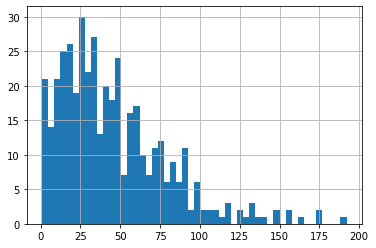

In [44]:
messages_final.groupby('user_id')['msg_count'].mean().hist(bins=50);

повторить то же для **internet**:

In [45]:
internet_b = pd.merge(internet, users[['user_id','tariff']], on='user_id')
internet_count = pd.merge(internet_b, tariffs[['tariff_name']], left_on='tariff', right_on='tariff_name')
internet_count = internet_count.drop(columns=['tariff_name'])
internet_count['month'] = internet_count.apply(lambda x: x['session_date'].month, axis=1)
internet_count

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,month
0,0,1000_0,112.95,2018-11-25,1000,ultra,11
1,1,1000_1,1052.81,2018-09-07,1000,ultra,9
2,2,1000_2,1197.26,2018-06-25,1000,ultra,6
3,3,1000_3,550.27,2018-08-22,1000,ultra,8
4,4,1000_4,302.56,2018-09-24,1000,ultra,9
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,smart,10
149392,149392,1499_153,490.13,2018-12-14,1499,smart,12
149393,149393,1499_154,0.00,2018-10-27,1499,smart,10
149394,149394,1499_155,1246.32,2018-11-26,1499,smart,11


In [46]:
internet_pt = internet_count[['user_id', 'month', 'mb_used']].pivot_table(index=['user_id', 'month'], aggfunc=['sum', 'count'])
internet_pt.columns = ['mb_used', 'session_count']
internet_pt = internet_pt.reset_index(0).reset_index(0)
internet_pt

,month,user_id,mb_used,session_count
0,5,1000,2253.49,5
1,6,1000,23233.77,49
2,7,1000,14003.64,29
3,8,1000,14055.93,29
4,9,1000,14568.91,27
...,...,...,...,...
3198,10,1498,20579.36,59
3199,9,1499,1845.75,5
3200,10,1499,17788.51,58
3201,11,1499,17963.31,49


In [47]:
internet_fin = pd.merge(internet_pt, users[['user_id','tariff']], on='user_id')
internet_fin

,month,user_id,mb_used,session_count,tariff
0,5,1000,2253.49,5,ultra
1,6,1000,23233.77,49,ultra
2,7,1000,14003.64,29,ultra
3,8,1000,14055.93,29,ultra
4,9,1000,14568.91,27,ultra
...,...,...,...,...,...
3198,10,1498,20579.36,59,smart
3199,9,1499,1845.75,5,smart
3200,10,1499,17788.51,58,smart
3201,11,1499,17963.31,49,smart


In [48]:
internet_final = pd.merge(internet_fin, tariffs[['rub_monthly_fee','mb_per_month_included', 'tariff_name', 'rub_per_gb']], left_on='tariff', right_on='tariff_name')
internet_final = internet_final.drop(columns=['tariff_name'])
internet_final

,month,user_id,mb_used,session_count,tariff,rub_monthly_fee,mb_per_month_included,rub_per_gb
0,5,1000,2253.49,5,ultra,1950,30720,150
1,6,1000,23233.77,49,ultra,1950,30720,150
2,7,1000,14003.64,29,ultra,1950,30720,150
3,8,1000,14055.93,29,ultra,1950,30720,150
4,9,1000,14568.91,27,ultra,1950,30720,150
...,...,...,...,...,...,...,...,...
3198,10,1498,20579.36,59,smart,550,15360,200
3199,9,1499,1845.75,5,smart,550,15360,200
3200,10,1499,17788.51,58,smart,550,15360,200
3201,11,1499,17963.31,49,smart,550,15360,200


In [49]:
import math 

internet_final['mb_used'] = internet_final['mb_used'].apply(lambda x: math.ceil(x))
internet_final

,month,user_id,mb_used,session_count,tariff,rub_monthly_fee,mb_per_month_included,rub_per_gb
0,5,1000,2254,5,ultra,1950,30720,150
1,6,1000,23234,49,ultra,1950,30720,150
2,7,1000,14004,29,ultra,1950,30720,150
3,8,1000,14056,29,ultra,1950,30720,150
4,9,1000,14569,27,ultra,1950,30720,150
...,...,...,...,...,...,...,...,...
3198,10,1498,20580,59,smart,550,15360,200
3199,9,1499,1846,5,smart,550,15360,200
3200,10,1499,17789,58,smart,550,15360,200
3201,11,1499,17964,49,smart,550,15360,200


Добавим колонку в которой считается разница в рублях между включенными гигабайтами и тем, что абонент потратил сверх тарифа:

In [50]:
internet_final['gb_overspent'] = internet_final.apply(lambda x: 0 if (x['mb_used'] - x['mb_per_month_included']) < 0 else math.ceil((x['mb_used'] - x['mb_per_month_included'])/1024), axis = 1)
internet_final

,month,user_id,mb_used,session_count,tariff,rub_monthly_fee,mb_per_month_included,rub_per_gb,gb_overspent
0,5,1000,2254,5,ultra,1950,30720,150,0
1,6,1000,23234,49,ultra,1950,30720,150,0
2,7,1000,14004,29,ultra,1950,30720,150,0
3,8,1000,14056,29,ultra,1950,30720,150,0
4,9,1000,14569,27,ultra,1950,30720,150,0
...,...,...,...,...,...,...,...,...,...
3198,10,1498,20580,59,smart,550,15360,200,6
3199,9,1499,1846,5,smart,550,15360,200,0
3200,10,1499,17789,58,smart,550,15360,200,3
3201,11,1499,17964,49,smart,550,15360,200,3


In [51]:
internet_final['rub_gb_overspent'] = internet_final.apply(lambda x: (x['gb_overspent']* x['rub_per_gb']), axis = 1)
internet_final

,month,user_id,mb_used,session_count,tariff,rub_monthly_fee,mb_per_month_included,rub_per_gb,gb_overspent,rub_gb_overspent
0,5,1000,2254,5,ultra,1950,30720,150,0,0
1,6,1000,23234,49,ultra,1950,30720,150,0,0
2,7,1000,14004,29,ultra,1950,30720,150,0,0
3,8,1000,14056,29,ultra,1950,30720,150,0,0
4,9,1000,14569,27,ultra,1950,30720,150,0,0
...,...,...,...,...,...,...,...,...,...,...
3198,10,1498,20580,59,smart,550,15360,200,6,1200
3199,9,1499,1846,5,smart,550,15360,200,0,0
3200,10,1499,17789,58,smart,550,15360,200,3,600
3201,11,1499,17964,49,smart,550,15360,200,3,600


In [52]:
internet_final_new=internet_final[['month','user_id','rub_gb_overspent']].pivot_table(index= ['user_id'], columns='month', aggfunc = 'sum').fillna(0)
internet_final_new

rub_gb_overspent                                                  \
month                 1       2       3       4       5       6       7    
user_id                                                                    
1000                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1001                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1002                 0.0     0.0     0.0     0.0     0.0     0.0   600.0   
1003                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1004                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                  ...     ...     ...     ...     ...     ...     ...   
1495                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1496                 0.0  2600.0  2000.0  1200.0  1800.0  1000.0  1800.0   
1497                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1498                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1499                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                                                 
month        8       9       10      11      12  
user_id                                          
1000        0.0     0.0     0.0     0.0     0.0  
1001        0.0     0.0     0.0   600.0     0.0  
1002     1000.0   400.0     0.0   800.0   600.0  
1003        0.0     0.0     0.0     0.0     0.0  
1004        0.0     0.0     0.0     0.0     0.0  
...         ...     ...     ...     ...     ...  
1495        0.0   450.0     0.0  1350.0     0.0  
1496     1600.0  2400.0  2600.0  2000.0  1200.0  
1497        0.0     0.0     0.0     0.0  1000.0  
1498     1800.0  1400.0  1200.0     0.0     0.0  
1499        0.0     0.0   600.0   600.0     0.0  

[497 rows x 12 columns]

In [53]:
internet_final_new['sum_for_all_time'] = internet_final_new.apply(sum, axis=1)
internet_final_new

rub_gb_overspent                                                  \
month                  1       2       3       4       5       6       7   
user_id                                                                    
1000                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1001                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1002                 0.0     0.0     0.0     0.0     0.0     0.0   600.0   
1003                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1004                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                  ...     ...     ...     ...     ...     ...     ...   
1495                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1496                 0.0  2600.0  2000.0  1200.0  1800.0  1000.0  1800.0   
1497                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1498                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1499                 0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                                                sum_for_all_time  
month         8       9      10      11      12                   
user_id                                                           
1000        0.0     0.0     0.0     0.0     0.0              0.0  
1001        0.0     0.0     0.0   600.0     0.0            600.0  
1002     1000.0   400.0     0.0   800.0   600.0           3400.0  
1003        0.0     0.0     0.0     0.0     0.0              0.0  
1004        0.0     0.0     0.0     0.0     0.0              0.0  
...         ...     ...     ...     ...     ...              ...  
1495        0.0   450.0     0.0  1350.0     0.0           1800.0  
1496     1600.0  2400.0  2600.0  2000.0  1200.0          20200.0  
1497        0.0     0.0     0.0     0.0  1000.0           1000.0  
1498     1800.0  1400.0  1200.0     0.0     0.0           4400.0  
1499        0.0     0.0   600.0   600.0     0.0           1200.0  

[497 rows x 13 columns]

Чтобы получить помесячную выручку с каждого пользователя сгруппируем по пользователям таблицы всех трёх составляющих 
тарифного плана: звонки, сообщения и интернет. Соберем таблицы:

In [54]:
calls_final_overspending = calls_final.pivot_table(
    index=['user_id', 'month'], values=['rub_minutes_overspent'], aggfunc='sum')

messages_final_overspending = messages_final.pivot_table(
    index=['user_id', 'month'], values=['rub_msg_overspent'], aggfunc='sum')

internet_final_overspending = internet_final.pivot_table(
    index=['user_id', 'month'], values=['rub_gb_overspent'], aggfunc='sum')

print(display(calls_final_overspending))
print('---------------------------------')
print(display(messages_final_overspending))
print('---------------------------------')
print(display(internet_final_overspending))

rub_minutes_overspent
user_id month                       
1000    5                          0
        6                          0
        7                          0
        8                          0
        9                          0
...                              ...
1498    10                         0
1499    9                          0
        10                         0
        11                       258
        12                         0

[3174 rows x 1 columns]

None
---------------------------------


rub_msg_overspent
user_id month                   
1000    5                    978
        6                    940
        7                    925
        8                    919
        9                    943
...                          ...
1498    10                    24
1499    9                    117
        10                     6
        11                     0
        12                     0

[2717 rows x 1 columns]

None
---------------------------------


rub_gb_overspent
user_id month                  
1000    5                     0
        6                     0
        7                     0
        8                     0
        9                     0
...                         ...
1498    10                 1200
1499    9                     0
        10                  600
        11                  600
        12                    0

[3203 rows x 1 columns]

None


Превратим все эти сводные в обычные таблицы чтобы можно было их смёрджить в одну:

In [55]:
calls_oversp = calls_final_overspending.reset_index(0).reset_index(0)
messages_oversp = messages_final_overspending.reset_index(0).reset_index(0)
internet_oversp = internet_final_overspending.reset_index(0).reset_index(0)

gross = pd.merge(
    internet_oversp, messages_oversp, how='outer', left_on=['user_id', 'month'], right_on=['user_id', 'month'])
gross_f1 = pd.merge(
    gross, calls_oversp, how='outer', left_on=['user_id', 'month'], right_on=['user_id', 'month'])
gross_f1

,month,user_id,rub_gb_overspent,rub_msg_overspent,rub_minutes_overspent
0,5,1000,0.0,978.0,0.0
1,6,1000,0.0,940.0,0.0
2,7,1000,0.0,925.0,0.0
3,8,1000,0.0,919.0,0.0
4,9,1000,0.0,943.0,0.0
...,...,...,...,...,...
3209,11,1273,NaN,971.0,0.0
3210,12,1273,NaN,961.0,0.0
3211,2,1377,NaN,998.0,0.0
3212,2,1392,NaN,997.0,0.0


Заполним пропуски:

In [56]:
gross_f1 = gross_f1.fillna(0)
gross_f1

,month,user_id,rub_gb_overspent,rub_msg_overspent,rub_minutes_overspent
0,5,1000,0.0,978.0,0.0
1,6,1000,0.0,940.0,0.0
2,7,1000,0.0,925.0,0.0
3,8,1000,0.0,919.0,0.0
4,9,1000,0.0,943.0,0.0
...,...,...,...,...,...
3209,11,1273,0.0,971.0,0.0
3210,12,1273,0.0,961.0,0.0
3211,2,1377,0.0,998.0,0.0
3212,2,1392,0.0,997.0,0.0


Добавим стоимость абонентской платы каждому пользователю:

In [57]:
gross_f2 = pd.merge(gross_f1, users[['user_id','tariff', 'city']], on='user_id')
gross_f3 = pd.merge(gross_f2, tariffs[['tariff_name', 'rub_monthly_fee']], left_on='tariff', right_on='tariff_name')
gross_f3 = gross_f3.drop(columns=['tariff_name'])
gross_f3

,month,user_id,rub_gb_overspent,rub_msg_overspent,rub_minutes_overspent,tariff,city,rub_monthly_fee
0,5,1000,0.0,978.0,0.0,ultra,Краснодар,1950
1,6,1000,0.0,940.0,0.0,ultra,Краснодар,1950
2,7,1000,0.0,925.0,0.0,ultra,Краснодар,1950
3,8,1000,0.0,919.0,0.0,ultra,Краснодар,1950
4,9,1000,0.0,943.0,0.0,ultra,Краснодар,1950
...,...,...,...,...,...,...,...,...
3209,10,1498,1200.0,24.0,0.0,smart,Владикавказ,550
3210,9,1499,0.0,117.0,0.0,smart,Пермь,550
3211,10,1499,600.0,6.0,0.0,smart,Пермь,550
3212,11,1499,600.0,0.0,258.0,smart,Пермь,550


In [58]:
gross_f3 = gross_f3[['user_id', 'month', 'tariff', 'city','rub_gb_overspent', 'rub_msg_overspent', 'rub_minutes_overspent', 'rub_monthly_fee']]
gross_f3

,user_id,month,tariff,city,rub_gb_overspent,rub_msg_overspent,rub_minutes_overspent,rub_monthly_fee
0,1000,5,ultra,Краснодар,0.0,978.0,0.0,1950
1,1000,6,ultra,Краснодар,0.0,940.0,0.0,1950
2,1000,7,ultra,Краснодар,0.0,925.0,0.0,1950
3,1000,8,ultra,Краснодар,0.0,919.0,0.0,1950
4,1000,9,ultra,Краснодар,0.0,943.0,0.0,1950
...,...,...,...,...,...,...,...,...
3209,1498,10,smart,Владикавказ,1200.0,24.0,0.0,550
3210,1499,9,smart,Пермь,0.0,117.0,0.0,550
3211,1499,10,smart,Пермь,600.0,6.0,0.0,550
3212,1499,11,smart,Пермь,600.0,0.0,258.0,550


Добавим колонку с помесячной выручкой по каждому пользователю:

In [74]:
gross_f3['monthly_income'] = gross_f3['rub_gb_overspent'] + gross_f3['rub_msg_overspent'] + gross_f3['rub_minutes_overspent'] + gross_f3['rub_monthly_fee']

C:\Users\ruk19\AppData\Local\Temp/ipykernel_27004/3545422131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_f3['monthly_income'] = gross_f3['rub_gb_overspent'] + gross_f3['rub_msg_overspent'] + gross_f3['rub_minutes_overspent'] + gross_f3['rub_monthly_fee']


In [75]:
gross_final = gross_f3.copy()
gross_final

,user_id,month,tariff,city,rub_gb_overspent,rub_msg_overspent,rub_minutes_overspent,rub_monthly_fee,monthly_income
0,1000,5,ultra,Краснодар,0.0,978.0,0.0,1950,2928.0
1,1000,6,ultra,Краснодар,0.0,940.0,0.0,1950,2890.0
2,1000,7,ultra,Краснодар,0.0,925.0,0.0,1950,2875.0
3,1000,8,ultra,Краснодар,0.0,919.0,0.0,1950,2869.0
4,1000,9,ultra,Краснодар,0.0,943.0,0.0,1950,2893.0
...,...,...,...,...,...,...,...,...,...
3209,1498,10,smart,Владикавказ,1200.0,24.0,0.0,550,1774.0
3210,1499,9,smart,Пермь,0.0,117.0,0.0,550,667.0
3211,1499,10,smart,Пермь,600.0,6.0,0.0,550,1156.0
3212,1499,11,smart,Пермь,600.0,0.0,258.0,550,1408.0


## Вывод

Таким образом в таблице мы имеем таблицу по которой можно отфильтровать данные по конкретным пользователям по столбцу **user_id**.

# Этап 3

## Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Проделаем требуемые операции со звонками**

Разделим абонентов smart и ultra:

In [102]:
calls_ultra = calls_final[['user_id', 'month', 'tariff', 'duration_sum']].query('tariff == "ultra"')
calls_smart = calls_final[['user_id', 'month', 'tariff', 'duration_sum']].query('tariff == "smart"')
calls_ultra

,user_id,month,tariff,duration_sum
0,1000,5,ultra,154
1,1000,6,ultra,174
2,1000,7,ultra,325
3,1000,8,ultra,401
4,1000,9,ultra,451
...,...,...,...,...
946,1495,8,ultra,92
947,1495,9,ultra,787
948,1495,10,ultra,1001
949,1495,11,ultra,905


Создадим сводные таблицы для обеих групп:

In [104]:
smart_users_month_calls = calls_smart.pivot_table(index=['month', 'user_id'], values='duration_sum', aggfunc='sum')
ultra_users_month__calls = calls_ultra.pivot_table(index=['month', 'user_id'], values='duration_sum', aggfunc='sum')

In [105]:
smart_users_month_calls

duration_sum
month user_id              
1     1005               96
      1032              377
      1045                8
      1055              543
      1071              191
...                     ...
12    1492              750
      1494              398
      1496              499
      1497              529
      1499              480

[2223 rows x 1 columns]

Поскольку придётся строить гистограммы еще пару раз, то напишем функцию, которая поможет повторить результат:

In [106]:
def build_hist(df1, df2, column):
    plt.hist(df1[column], bins=30, alpha=0.5, label='Тариф Smart')
    plt.hist(df2[column], bins=30, alpha=0.5, label='Тариф Ultra')
    plt.legend(loc='upper right')
    plt.show()

Построим гистограммы и посмотрим на распределение по общей месячной длительности звонков:

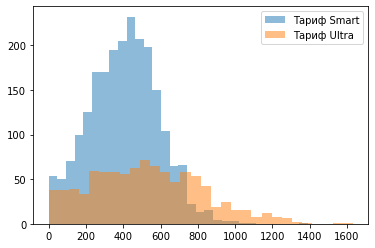

In [108]:
build_hist(smart_users_month_calls, ultra_users_month_calls, 'duration_sum')

Напишем функцию для автоматизации описательной части датафреймов:

In [109]:
def get_desc_with_var(df, column_name):
    describe = df.describe()
    df_var = pd.DataFrame.from_dict({'var': float(df[column_name].var())}, orient='index', columns=[column_name])
    return describe.append(df_var).round(1)

In [111]:
get_desc_with_var(smart_users_month_calls, 'duration_sum')

,duration_sum
count,2223.0
mean,406.9
std,183.5
min,1.0
25%,275.0
50%,412.0
75%,530.0
max,1391.0
var,33664.5


In [113]:
get_desc_with_var(ultra_users_month_calls, 'duration_sum')

,duration_sum
count,951.0
mean,529.3
std,297.4
min,0.0
25%,300.0
50%,513.0
75%,735.0
max,1631.0
var,88469.9


Посчитаем дисперсию для обеих тарифов. Использую метод **var()** для демонстрации использования:

In [131]:
print('Дисперсия звонков тарифа Smart:', round(smart_users_month['duration_sum'].var(), 2))
print('Дисперсия звонков тарифа Ultra:', round(ultra_users_month['duration_sum'].var(), 2))

Дисперсия звонков тарифа Smart: 33664.5
Дисперсия звонков тарифа Ultra: 88469.89


### Вывод 
- В среднем в месяц абоненты тарифа Smart проговаривают по 406 минуты, а пользователи Ultra - 529; если верить медиане, то ровно середина для тарифа Smart - это 412 минут в месяц, а те кто пользуется Ultra - ровно 513. Дисперсия для тарифа Smart - 33664.50, для Ultra - 88469.89.
- Исходя из графиков, пользователи тарифа Smart расходуют запас минут гораздо экономнее - среднее меньше на 23%, а стандартное отклонение меньше, чем у пользователей тарифа Ultra на целых 38% - пользователи Ultra расходуют связь не обращая внимания на лимит - на графике у тарифа практически плоское по сравнению с Smart распределение значений.



#### Сообщения
Все те же самые операции проделаем и для сообщений: сегментация, описание данных, высчитываение дисперсии и описываем полученные данные:

In [132]:
msg_smart = messages_final[['user_id', 'month', 'tariff', 'msg_count']].query('tariff == "smart"')
msg_ultra = messages_final[['user_id', 'month', 'tariff', 'msg_count']].query('tariff == "ultra"')

Создадим сводные таблицы для обеих групп:

In [133]:
smart_users_month_msg = msg_smart.pivot_table(index=['month', 'user_id'], values='msg_count', aggfunc='sum')
ultra_users_month_msg = msg_ultra.pivot_table(index=['month', 'user_id'], values='msg_count', aggfunc='sum')

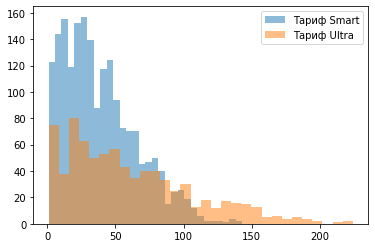

In [134]:
build_hist(smart_users_month_msg, ultra_users_month_msg, 'msg_count')

In [135]:
get_desc_with_var(smart_users_month_msg, 'msg_count')

,msg_count
count,1922.0
mean,38.7
std,26.8
min,1.0
25%,17.0
50%,34.0
75%,55.0
max,143.0
var,717.6


In [136]:
get_desc_with_var(ultra_users_month_msg, 'msg_count')

,msg_count
count,795.0
mean,61.2
std,45.9
min,1.0
25%,24.0
50%,51.0
75%,87.5
max,224.0
var,2109.7


### Вывод 

Абоненты тарифа Smart и тарифа Ultra действительно различаются в поведении - пользующиеся тарифом Smart более экономны и расходуют в среднем около 34 сообщений в месяц, при этом основной "костяк" абонентов (+/- 1 стандартное отклонение, то есть, 68,2% всех абонентов, что использовали сообщения за все месяцы года) используют от 12 до 66 сообщений.
Пользователи тарифа Ultra отправляют в среднем 51 сообщение (судя по медиане), при это разброс значений гораздо больше у этой выборки - от 15 до 107 сообщений, что всё равно больше, чем отправляют пользователи Smart.
Однако, пользователи Ultra в течение этого года никогда не использовали лимит - максимальное значение в выборке Ultra - 224 сообщения, при этом лимит в тарифе - 1000 штук. Если посмотреть на абонентов Smart, то уже третья квартиль распределения "залезает" за лимит в 50 сообщений (55). Визуально по графику можно сказать, что где-то четверть абонентов регулярно платят за дополнительные SMS.

#### Интернет-трафик

In [141]:
internet_smart = internet_final[['user_id', 'month', 'tariff', 'mb_used']].query('tariff == "smart" & mb_used != 0')
internet_ultra = internet_final[['user_id', 'month', 'tariff', 'mb_used']].query('tariff == "ultra" & mb_used != 0')

smart_users_month_inet = internet_smart.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')
ultra_users_month_inet = internet_ultra.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')

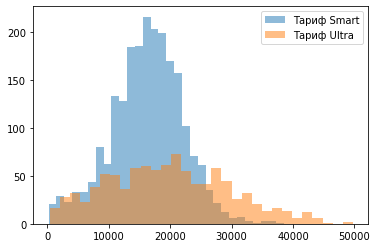

In [142]:
build_hist(smart_users_month_inet, ultra_users_month_inet, 'mb_used')

In [143]:
get_desc_with_var(smart_users_month_inet, 'mb_used')

,mb_used
count,2227.0
mean,16223.4
std,5853.0
min,202.0
25%,12659.5
50%,16509.0
75%,20045.0
max,38553.0
var,34257257.7


In [144]:
get_desc_with_var(ultra_users_month_inet, 'mb_used')

,mb_used
count,974.0
mean,19689.2
std,9928.1
min,366.0
25%,12062.5
50%,19409.5
75%,26912.5
max,49746.0
var,98568043.4


### Вывод

Абоненты тарифа Smart и тарифа Ultra как и в звонках, так и в интернете, сильно различны в поведении. Если в среднем представитель Ultra тратит около 19 Гб, а медиана и средние значения практически одинаковы, то средний представитель абонентов тарифа Smart тратит по 16 Гб в месяц. При этом у абонентов Smart третья квартиль находится на уровне чуть больше 19.6 Гб, то те, кто пользуются Ultra используют по 26.8 Гб в месяц, при этом этом максимальные значения расходятся почти на 23% - пользователи Ultra пользуются интернетом гораздо больше.

# Этап 4

## Проверьте гипотезы

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

$H_0$ и $H_1$ уже сформулированы в задаче - "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается", где данное задание будет $H_1$, а $H_0$ - "средняя выручка пользователей тарифов «Ультра» и «Смарт» равна". 

Для доказательства или опровержения гипотезы мы можем пойти двумя путями: 

<ol>
    <li> Взять стратфицированную выборку из ~100 значений из обоих датасетов. При этом нужно будет решить какие значения являются репрезентативными для определённой выборки, а какие - нет.</li>
    <li> Возьмём весь датасет из тарифа Ultra и стратфицированную выборку из тарифа Smart.</li>
</ol>
    
Максимальная "точность" которой можно достичь даёт второй вариант.

Создадим срезы совокупного дохода по тарифам:

In [150]:
g_smart_income = gross_final.query('tariff == "smart"').groupby(['user_id']).sum()['monthly_income']
g_ultra_income = gross_final.query('tariff == "ultra"').groupby(['user_id']).sum()['monthly_income']

In [154]:
g_ultra_income

user_id
1000    23104.0
1003    14370.0
1004    22408.0
1013     5858.0
1016     5758.0
         ...   
1476    25505.0
1485     2795.0
1491    26118.0
1493     7606.0
1495    16210.0
Name: monthly_income, Length: 148, dtype: float64

None


In [155]:
g_smart_income

user_id
1001     1700.0
1002     8090.0
1005     9582.0
1006    10250.0
1007     8722.0
         ...   
1494     4950.0
1496    28366.0
1497     3034.0
1498     6732.0
1499     3781.0
Name: monthly_income, Length: 350, dtype: float64

In [156]:
ultra_size = len(g_ultra_income)
ultra_size

148

Получим 148 выборочных значений по абонентам тарифа Smart:

In [172]:
import random

sample_smart = random.sample(list(g_smart_income), ultra_size)
sample_ultra = list(g_ultra_income)
len(sample_smart)

148

In [187]:
print('Smart')
print()
print(pd.Series(sample_smart).describe().round())
print('----------------')
print()
print('Ultra')
print()
print(pd.Series(sample_ultra).describe().round())

Smart

count      148.0
mean      8102.0
std       5115.0
min        640.0
25%       4464.0
50%       7735.0
75%      10416.0
max      26380.0
dtype: float64
----------------

Ultra

count      148.0
mean     18821.0
std       9335.0
min       1950.0
25%      11335.0
50%      19500.0
75%      26183.0
max      38670.0
dtype: float64


#### Гипотеза о равенстве средних двух генеральных совокупностей

- Оснований предполагать, что выборки взяты из схожих по параметрам совокупностей нет, так как они взяты из двух разных тарифов. Общего у них только единицы изменерия этих тарифов.
- Два массива, которые мы передаём - это **sample_smart и sample_ultra** имеют одинаковый **shape**.


In [174]:
from scipy import stats as st

In [183]:
st.ttest_ind(sample_smart, sample_ultra, equal_var = False)

Ttest_indResult(statistic=-12.25034293643234, pvalue=7.621632279043771e-27)

In [184]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
n=st.ttest_ind(sample_smart, sample_ultra, equal_var = False)
print('p-значение:', (n.pvalue))
if n.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 7.621632279043771e-27
Отвергаем нулевую гипотезу


Хотя, метод и написан, но проверять его на более высоких доверительных интервалах нет смысла - выходит, что при трёх из общепринятых $\alpha$ (95%, 99% и 99,9%) $H_0$ можно отвергнуть.

#### Вывод

Делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различается. 

Выручка пользователей тарифа «Ультра» превосходит выручку пакетов «Смарт».

### Сравнение выручки по абонентам из Москвы и других регионов

Проверим выручку для пользователей из Москвы и других регионов на равенство, проделаем все те же операции с другими выборками.<br>
$H_0$: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.<br>
$H_1$: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<br>

Чтобы это сделать, так же проверим предположение, что пользователей из Москвы меньше, чем пользователей из других регионов:

Создадим срезы оборота по Москве и другим регионам:

In [188]:
g_moscow_income = gross_final.query('city == "Москва"').groupby(['user_id']).sum()['monthly_income']
g_other_income = gross_final.query('city != "Москва"').groupby(['user_id']).sum()['monthly_income']

In [193]:
g_moscow_income

user_id
1001     1700.0
1003    14370.0
1007     8722.0
1031     1844.0
1033    11142.0
         ...   
1453    34704.0
1461     5800.0
1476    25505.0
1481    13673.0
1490     9867.0
Name: monthly_income, Length: 99, dtype: float64

In [194]:
g_other_income

user_id
1000    23104.0
1002     8090.0
1004    22408.0
1005     9582.0
1006    10250.0
         ...   
1495    16210.0
1496    28366.0
1497     3034.0
1498     6732.0
1499     3781.0
Name: monthly_income, Length: 399, dtype: float64

In [202]:
sample_msc = list(g_moscow_income)
size_msc = len(sample_msc)
size_msc

99

In [191]:
g_moscow_income.describe().round(1)

count       99.0
mean     11467.8
std       9247.7
min        550.0
25%       5387.0
50%       8748.0
75%      15662.5
max      38670.0
Name: monthly_income, dtype: float64

In [192]:
g_other_income.describe().round(1)

count      399.0
mean     11402.5
std       8107.9
min        550.0
25%       5306.5
50%       9067.0
75%      15776.5
max      36846.0
Name: monthly_income, dtype: float64

In [199]:
sample_other = random.sample(list(g_other_income), size_msc)
len(sample_other)

99

In [203]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
n=st.ttest_ind(sample_other, sample_msc, equal_var = False)
print('p-значение:', (n.pvalue))
if n.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.9745259147615055
Не получилось отвергнуть нулевую гипотезу


Исходя из невозможности отвержения нулевой гипотезы, которая звучит как "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов" мы делаем вывод, что средняя выручка равна.

# Этап 5

## Общий вывод

Средняя выручка - вот что волнует менеджеров. Ответом на вопрос: у тарифа Ультра на пользователя выручка выше. Можно также сделать вывод, что тариф Ультра более прибылен, так как пользователи не всегда до конца пользуются всем пакетом и недоиспользуют ресурс, при этом часто пользуются интернетом и звонками, при условии что оставшиеся минуты и гигабайты "сгорают" и не переносятся на следующий месяц. Однако, тариф "Смарт" не отстаёт - пользователи нередко переходят лимит во всех трёх составляющих и переплачивают за связь.